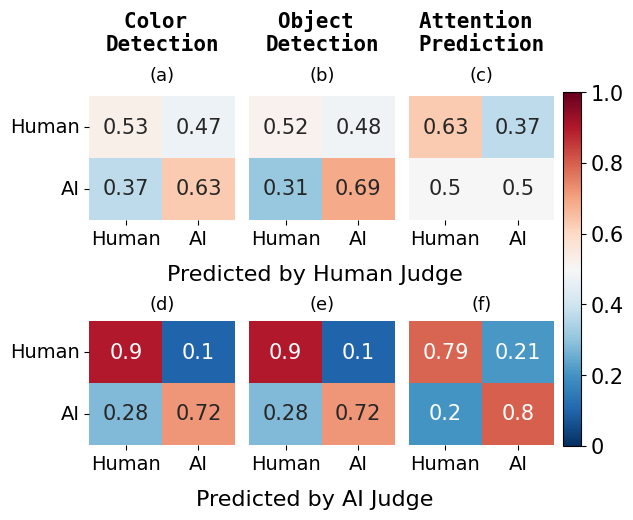

In [1]:
#plot confusion matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

results_dict = {0: {0: [[0.55, 0.45], [0.42, 0.58]], 
                    1: [[0.52, 0.48], [0.31, 0.69]], 
                    2: [[0.63, 0.37], [0.50, 0.50]]}, 
                1: {0: [[0.43, 0.57], [0.66, 0.34]], 
                    1: [[0.90, 0.10], [0.28, 0.72]], 
                    2: [[0.79, 0.21], [0.19, 0.81]] 
                    }}

### load all confmat data

#image captioning (for human judges)
with open('../../dominant_color_recognition/Plot/savedResults/Task4_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[0][0][0][0] = confmat[0][0]
results_dict[0][0][0][1] = confmat[0][1]
results_dict[0][0][1][0] = confmat[1][0]
results_dict[0][0][1][1] = confmat[1][1]

#image captioning (for AI judges)
with open('../../dominant_color_recognition/Plot/savedResults/Task4_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[1][0][0][0] = confmat[0][0]
results_dict[1][0][0][1] = confmat[0][1]
results_dict[1][0][1][0] = confmat[1][0]
results_dict[1][0][1][1] = confmat[1][1]

#wordAssociation (for human judges)
with open('../../multi_label_prediction/Plot/savedResults/Task5_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[0][0][0][0] = confmat[0][0]
results_dict[0][0][0][1] = confmat[0][1]
results_dict[0][0][1][0] = confmat[1][0]
results_dict[0][0][1][1] = confmat[1][1]

#wordAssociation (for AI judges)
with open('../../multi_label_prediction/Plot/savedResults/Task5_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)

results_dict[1][0][0][0] = confmat[0][0]
results_dict[1][0][0][1] = confmat[0][1]
results_dict[1][0][1][0] = confmat[1][0]
results_dict[1][0][1][1] = confmat[1][1]


#conversation (for human judges)
with open('../../attention_prediction_task/Plot/savedResults/Task6_mturk_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)
    
results_dict[0][2][0][0] = confmat[0][0]
results_dict[0][2][0][1] = confmat[0][1]
results_dict[0][2][1][0] = confmat[1][0]
results_dict[0][2][1][1] = confmat[1][1]

#conversation (for AI judges)
with open('../../attention_prediction_task/Plot/savedResults/Task6_machine_confmat.np.npy', "rb") as fp:   # Unpickling
    confmat = np.load(fp)
    
results_dict[1][2][0][0] = confmat[0][0]
results_dict[1][2][0][1] = confmat[0][1]
results_dict[1][2][1][0] = confmat[1][0]
results_dict[1][2][1][1] = confmat[1][1]

tasks = ['Color \nDetection', 'Object \nDetection', 'Attention \nPrediction']
tasks_1 = ['(a)\n\n\n\n\n\n\n\n\n\n\n(d)', '(b)\n\n\n\n\n\n\n\n\n\n\n(e)', '(c)\n\n\n\n\n\n\n\n\n\n\n(f)']

fig = plt.figure(figsize = (6, 4.5), constrained_layout=False)
# fig = plt.figure()
# fig.suptitle('Figure title')

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    if row == 0:
        subfig.suptitle('Predicted by Human Judge', y=0.25, fontsize=16)
    else:
        subfig.suptitle('Predicted by AI Judge', y=0.25, fontsize=16)

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    # subfig.supylabel('Ground Truth')
    
    for col, ax in enumerate(axs):
        
        if row in [0, 1] and col!=0:
            sn.heatmap(results_dict[row][col], annot=True,robust=True, cmap='RdBu_r', 
                       vmin=0, vmax=1, cbar=False, yticklabels=False, ax=ax, annot_kws={"fontsize":15})
        else:
            sn.heatmap(results_dict[row][col], annot=True,robust=True, cmap='RdBu_r', 
                       vmin=0, vmax=1, cbar=False, yticklabels=True, ax=ax, annot_kws={"fontsize":15})
            
            ax.set_yticks([0.5, 1.5]) 
            ax.set_yticklabels(['Human', 'AI'], rotation=0, fontsize=14)
        ax.set_xticklabels(['Human', 'AI'], rotation=0, fontsize=14)
        
        if row == 0:
            ax.set_title(tasks[col], fontweight=580, fontfamily='monospace', fontsize=15, y=1.30)
            # ax.set_title(tasks[col]+'\n\n\n\n\n\n\n\n'+'(a)', fontweight=480, fontfamily='monospace', fontsize=15, y=-0.49)
        else:
            ax.set_title(tasks_1[col], y=1.03, fontsize=13)

            
norm = plt.Normalize(0, 1)
sm = plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', shrink=2.04, aspect=20, anchor=(1.5, -0.42))
cbar.ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.ax.set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=15, rotation=0)

# fig.supylabel('Ground Truth', y=0.6, fontsize=16)
fig.subplots_adjust(top=1, bottom=0.45, wspace=0.1)

#plt.tight_layout()
plt.savefig('./FigsAll/TaskAll_overall_confmat.eps', format='eps')
plt.savefig('./FigsAll/TaskAll_overall_confmat.svg')
plt.savefig('./FigsAll/TaskAll_overall_confmat.png', bbox_inches='tight')
#plt.savefig('fig4_mod.pdf', bbox_inches = 'tight')
plt.show()